In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
'''Task 1 . This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)'''


url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5,1,'Sex Proportion')

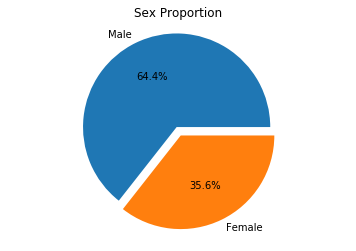

In [13]:
'''Charts to plot:
1. Create a pie chart presenting the male/female proportion'''

# extract data from dataframe
male = (titanic['sex'] == 'male').sum()
female = ( titanic['sex'] == 'female').sum()

#set labels, axis, size, title and plot
labels =['Male','Female']
sizes = [male,female]
plt.pie(sizes, labels = labels, explode = (0.10 , 0), autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Sex Proportion")

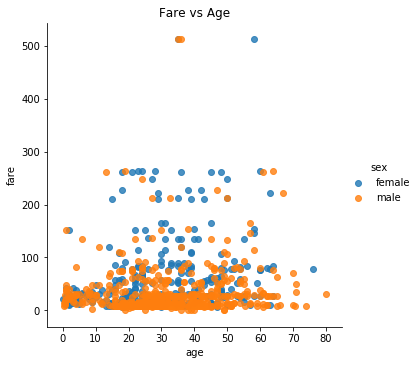

In [14]:
'''2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender'''

import seaborn as sns
# set properties
lm = sns.lmplot(x = 'age', y = 'fare', data = titanic, hue = 'sex', fit_reg=False)

# set title
lm.set(title = 'Fare vs Age')

In [15]:
#Task 2:

import numpy as np

#input data
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',      'Budapest_PaRis', 'Brussels_londOn'],  
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],  
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',  '12. Air France', '"Swiss Air"']}) 

df.head()


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [16]:
'''1. Some values in the the FlightNumber column are missing. These numbers are meant to     
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing  
numbers and make the column an integer column (instead of a float column). '''


df['FlightNumber'] = df['FlightNumber'].interpolate()
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [17]:
'''2. The From_To column would be better as two separate columns! Split each string on the        
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the 
correct column names to this temporary DataFrame. '''

temp_df = pd.DataFrame(df['From_To'])

#split From column
temp_df['From'] =df['From_To'].str.split('_').str[0].tolist()

#split To column
temp_df['To'] =df['From_To'].str.split('_').str[1].tolist()

#drop From_To column
temp_df = temp_df.drop('From_To',axis=1)
temp_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [18]:
'''3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. 
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become   
"London".) '''

# Capitalise title of columns
temp_df['From'] = temp_df['From'].str.title()
temp_df['To']= temp_df['To'].str.title()
temp_df


,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [19]:
'''4. Delete the From_To column from df and attach the temporary DataFrame from the previous       
questions. '''

#Drop From_To column
df = df.drop('From_To', axis =1)

#Attach temp_df to df
df = pd.concat([temp_df, df], axis = 1)
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045.0,"[23, 47]",KLM(!)
1,Madrid,Milan,10055.0,[],<Air France> (12)
2,London,Stockholm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075.0,[13],12. Air France
4,Brussels,London,10085.0,"[67, 32]","""Swiss Air"""


In [20]:
'''5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.'''


#construct delays dataframe
delays = pd.DataFrame(df['RecentDelays'].values.tolist())
delays.columns = ['Delay_1', 'Delay_2', 'Delay_3']

#drop RecentDelays from df
df = df.drop('RecentDelays', 1)

#insert new columns into df
df.insert(3, "Delay_1", delays['Delay_1'])
df.insert(4, "Delay_2", delays['Delay_2'])
df.insert(5, "Delay_3", delays['Delay_3'])
df

,From,To,FlightNumber,Delay_1,Delay_2,Delay_3,Airline
0,London,Paris,10045.0,23.0,47.0,NaN,KLM(!)
1,Madrid,Milan,10055.0,NaN,NaN,NaN,<Air France> (12)
2,London,Stockholm,10065.0,24.0,43.0,87.0,(British Airways. )
3,Budapest,Paris,10075.0,13.0,NaN,NaN,12. Air France
4,Brussels,London,10085.0,67.0,32.0,NaN,"""Swiss Air"""
